<a href="https://colab.research.google.com/github/rahiakela/edureka-deep-learning-with-tensorflow/blob/module-8-keras/module_8_assignment__classifying_newswires_using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 8 Assignment: Classifying newswires using *Keras*

Load the ‘Reuters newswire topics classification’ dataset and
perform the following tasks:
* Study the Reuters newswire dataset.
* Import the dataset from ‘keras.datsets’.
* Create an MLP for classification of the dataset.
* Print the test accuracy of the model.

## Setup

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## The Reuters dataset

You’ll work with the Reuters dataset, a set of short newswires and their topics, published
by Reuters in 1986. It’s a simple, widely used toy dataset for text classification. There
are 46 different topics; some topics are more represented than others, but each topic
has at least 10 examples in the training set.

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


As with the IMDB dataset, the argument num_words=10000 restricts the data to the
10,000 most frequently occurring words found in the data.

You have 8,982 training examples and 2,246 test examples:

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

As with the IMDB reviews, each example is a list of integers (word indices):

In [5]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


Here’s how you can decode it back to words, in case you’re curious.

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

557056/550378 [==============================] - 0s 0us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

The label associated with an example is an integer between 0 and 45: a topic index.

In [7]:
train_labels[10]

3

## Preparing the data

You can vectorize the data with the exact same code as in the previous example.

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)   
# Our vectorized test data
x_test = vectorize_sequences(test_data)

To vectorize the labels, there are two possibilities: you can cast the label list as an integer
tensor, or you can use one-hot encoding. One-hot encoding is a widely used format
for categorical data, also called categorical encoding.

In [0]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

Note that there is a built-in way to do this in Keras, which you have already seen in action in our MNIST example:

In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## Building your network

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000, )))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

In [0]:
# Compiling the model
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

## Validating our approach

Let’s set apart 1,000 samples in the training data to use as a validation set.

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Now let's train our network for 20 epochs:

In [14]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 55ms/step - loss: 2.6001 - accuracy: 0.5193 - val_loss: 1.7262 - val_accuracy: 0.6440
Epoch 2/20
16/16 [==============================] - 1s 45ms/step - loss: 1.4000 - accuracy: 0.7155 - val_loss: 1.3035 - val_accuracy: 0.7170
Epoch 3/20
16/16 [==============================] - 1s 44ms/step - loss: 1.0435 - accuracy: 0.7781 - val_loss: 1.1430 - val_accuracy: 0.7640
Epoch 4/20
16/16 [==============================] - 1s 45ms/step - loss: 0.8155 - accuracy: 0.8301 - val_loss: 1.0442 - val_accuracy: 0.7780
Epoch 5/20
16/16 [==============================] - 1s 42ms/step - loss: 0.6505 - accuracy: 0.8651 - val_loss: 0.9707 - val_accuracy: 0.8040
Epoch 6/20
16/16 [==============================] - 1s 42ms/step - loss: 0.5146 - accuracy: 0.8911 - val_loss: 0.9389 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 1s 44ms/step - loss: 0.4164 - accuracy: 0.9141 - val_loss: 0.9218 - val_accuracy: 0.8140
Epoch 8/20
16

And finally, let’s display its loss and accuracy curves

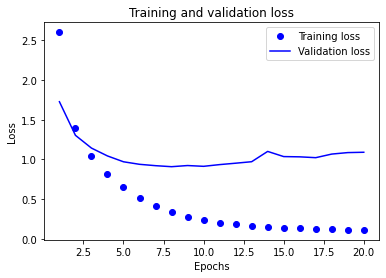

In [15]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

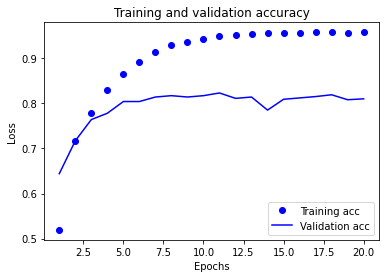

In [16]:
# Plotting the training and validation accuracy
plt.clf()  # Clears the figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

It seems that the network starts overfitting after 8 epochs. Let's train a new network from scratch for 8 epochs, then let's evaluate it on the test set:

In [17]:
# Retraining a model from scratch
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(10000,)))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(46, activation='softmax'))

# compile the model
model_1.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
model_1.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

# evaluate the model
results = model_1.evaluate(x_test, one_hot_test_labels, verbose=0)

Epoch 1/9
16/16 [==============================] - 1s 49ms/step - loss: 2.6957 - accuracy: 0.5219 - val_loss: 1.7559 - val_accuracy: 0.6420
Epoch 2/9
16/16 [==============================] - 1s 46ms/step - loss: 1.4312 - accuracy: 0.7027 - val_loss: 1.3167 - val_accuracy: 0.7220
Epoch 3/9
16/16 [==============================] - 1s 44ms/step - loss: 1.0607 - accuracy: 0.7741 - val_loss: 1.1536 - val_accuracy: 0.7560
Epoch 4/9
16/16 [==============================] - 1s 44ms/step - loss: 0.8317 - accuracy: 0.8237 - val_loss: 1.0499 - val_accuracy: 0.7740
Epoch 5/9
16/16 [==============================] - 1s 44ms/step - loss: 0.6649 - accuracy: 0.8602 - val_loss: 0.9830 - val_accuracy: 0.7990
Epoch 6/9
16/16 [==============================] - 1s 45ms/step - loss: 0.5268 - accuracy: 0.8877 - val_loss: 0.9425 - val_accuracy: 0.7970
Epoch 7/9
16/16 [==============================] - 1s 45ms/step - loss: 0.4287 - accuracy: 0.9077 - val_loss: 0.9180 - val_accuracy: 0.8060
Epoch 8/9
16/16 [===

In [18]:
# Here are the final results:
results

[0.9994833469390869, 0.7871772050857544]

Our approach reaches an accuracy of ~79%. With a balanced binary classification problem, the accuracy reached by a purely random classifier would be 50%, but in our case it is closer to 19%, so our results seem pretty good, at least when compared to a random baseline:

In [19]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18076580587711488